In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Read vehicles.csv
vehicles_data = pd.read_csv('./vehicles.csv')

In [23]:
# Read data
vehicles_data

,policy_id,car_no,ownership_type,color,age,make_model
0,policy_74571,1,leased,other,4.0,BMW : R1200CL
1,policy_74571,2,owned,blue,3.0,ACURA : TL
2,policy_1998,1,owned,gray,7.0,BMW : 750LI
3,policy_28085,1,owned,gray,4.0,MERCEDES-BENZ : G55 AMG
4,policy_64282,1,owned,black,4.0,BMW : 550I GT
...,...,...,...,...,...,...
169232,policy_34204,4,owned,gray,6.0,TOYOTA : RAV4
169233,policy_34204,5,loaned,black,8.0,GMC : SIERRA 1500
169234,policy_621,1,owned,other,6.0,DODGE : CHARGER
169235,policy_621,2,owned,black,3.0,GMC : SAVANA 4500


In [4]:
# delete the first column because there is no definition of the colum.

vehicles_data.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [5]:
vehicles_data.head()

,policy_id,car_no,ownership_type,color,age,make_model
0,policy_74571,1,leased,other,4.0,BMW : R1200CL
1,policy_74571,2,owned,blue,3.0,ACURA : TL
2,policy_1998,1,owned,gray,7.0,BMW : 750LI
3,policy_28085,1,owned,gray,4.0,MERCEDES-BENZ : G55 AMG
4,policy_64282,1,owned,black,4.0,BMW : 550I GT


In [6]:
# check if there is any missing value
vehicles_data.isna().sum()

policy_id            0
car_no               0
ownership_type       0
color             1072
age                536
make_model           0
dtype: int64

As we can see there are 1072 missing color information and 536 missing age(of car) information.

In [7]:
# percentage of raw includes missing value out of total data.
vehicles_data[vehicles_data['color'].isna() | vehicles_data['age'].isna()].shape[0] / vehicles_data.shape[0]

0.009460106241542926

In [8]:
# data that includes missing value. (1072 samples)
vehicles_data[vehicles_data['color'].isna()]

,policy_id,car_no,ownership_type,color,age,make_model
77,policy_77901,3,owned,NaN,4.0,BMW : 535D
245,policy_37794,3,owned,NaN,7.0,ACURA : RL
515,policy_60534,4,owned,NaN,2.0,MERCEDES-BENZ : ML63 AMG
577,policy_36358,1,loaned,NaN,7.0,MERCEDES-BENZ : SL600
637,policy_14342,2,owned,NaN,9.0,BMW : 135I
...,...,...,...,...,...,...
168116,policy_29878,3,leased,NaN,7.0,FORD : GRAND MARQUIS
168174,policy_38226,2,owned,NaN,4.0,FORD : EXPLORER SPORT TRAC
168341,policy_30342,1,owned,NaN,4.0,FORD : LOBO
168342,policy_58543,1,owned,NaN,7.0,HONDA : ODYSSEY


Percentage of raws including missing value is approximately 0.95% out of total.

How we can deal with those?

1. simply deleting raws including any missing value.
2. imputation using mean, median or mod.

For missing color information, we can observe what it the model of car because there is no any missing vlaue for the make_model column.

In [9]:
# number of samples do not have color information.
list_missing_color_cars = list(vehicles_data[vehicles_data['color'].isna()==True]['make_model'].unique())

In [10]:
# imputation using mod of color of each car type
dict_mod_colors = {}
for i in list_missing_color_cars:
    dict_mod_colors[i] = vehicles_data[vehicles_data['make_model']==i]['color'].value_counts().index.tolist()[0]
    
for i in range(len(vehicles_data)):
    
    if type(vehicles_data.loc[i]['color'])==float:
        
        vehicles_data.loc[i, ('color')]=dict_mod_colors[vehicles_data.loc[i]['make_model']]

In [11]:
# now we don't have any missing color data
vehicles_data.isna().sum()

policy_id           0
car_no              0
ownership_type      0
color               0
age               536
make_model          0
dtype: int64

In [12]:
# imputation using mean of age
vehicles_data = vehicles_data.fillna(vehicles_data.mean()['age'])

In [13]:
# no missing value
vehicles_data.isna().sum()

policy_id         0
car_no            0
ownership_type    0
color             0
age               0
make_model        0
dtype: int64

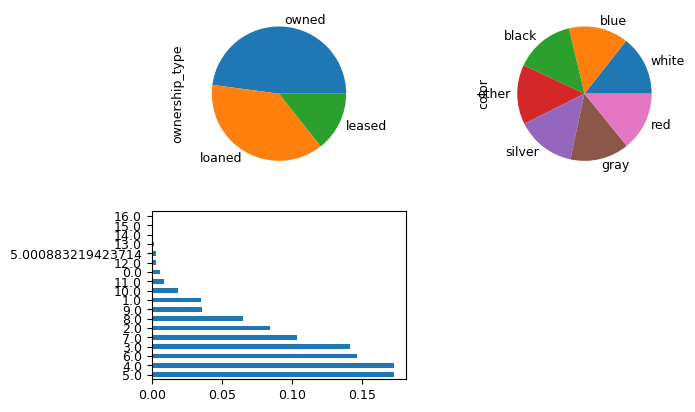

In [14]:
plt.rc('font', size=9)  
plt.subplots_adjust(right=1)


plt.subplot(221)
vehicles_data.ownership_type.value_counts(normalize=True).plot.pie()

plt.subplot(222)
vehicles_data.color.value_counts(normalize=True).plot.pie()

plt.subplot(223)
vehicles_data.age.value_counts(normalize=True).plot.barh()

plt.show()

In [15]:
vehicles_data.car_no.describe()

count    169237.000000
mean          2.485231
std           1.345593
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           8.000000
Name: car_no, dtype: float64

In [16]:
vehicles_data.age.describe()

count    169237.000000
mean          5.000883
std           2.244886
min           0.000000
25%           3.000000
50%           5.000000
75%           6.000000
max          16.000000
Name: age, dtype: float64

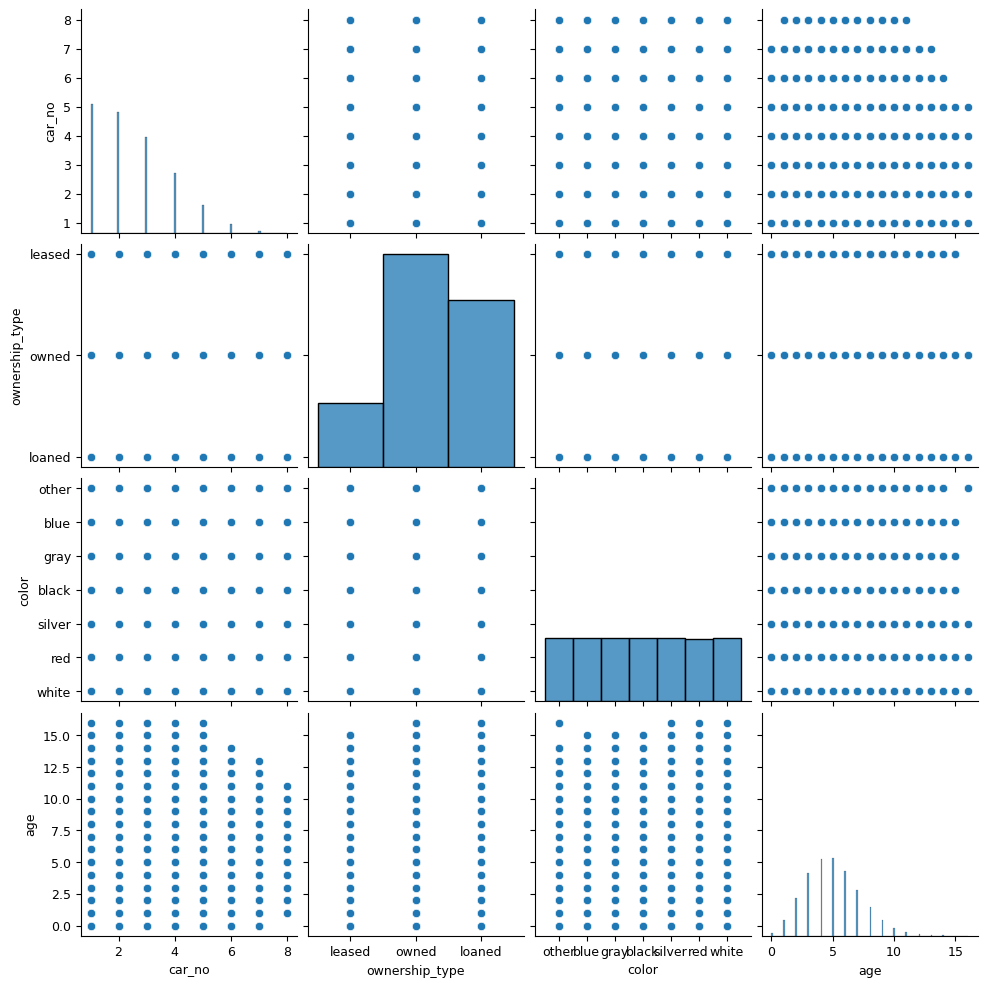

In [17]:
sns.pairplot(data=vehicles_data, vars=['car_no', 'ownership_type', 'color', 'age'])

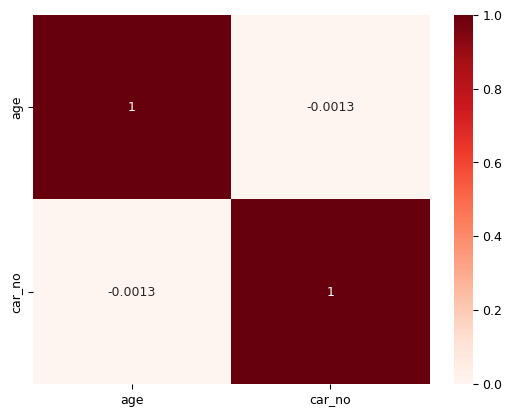

In [18]:
sns.heatmap(vehicles_data[['age', 'car_no']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [19]:
# for i in list(vehicles_data.groupby('policy_id')['car_no'].max()):
#     print(i, list(vehicles_data.groupby('policy_id')['car_no'].max()).count(i))

In [20]:
vehicles_data.groupby('policy_id')['car_no'].max()

policy_id
policy_100      6
policy_1000     2
policy_10001    2
policy_10002    5
policy_10004    2
               ..
policy_99994    4
policy_99996    4
policy_99997    4
policy_99998    1
policy_99999    6
Name: car_no, Length: 49162, dtype: int64

In [21]:
# temp includes number of cards included in each policy
temp = list(vehicles_data.groupby('policy_id')['car_no'].max())

                  0
count  49162.000000
mean       3.442435
std        1.348233
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000


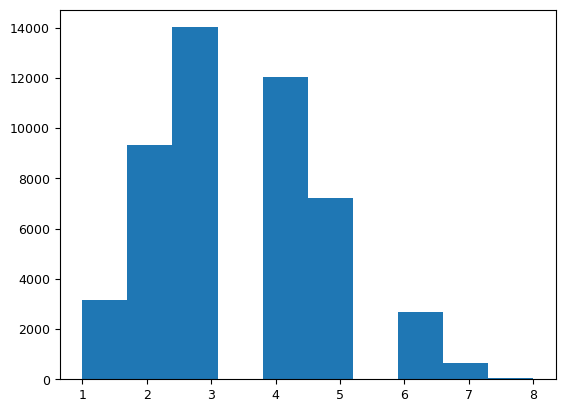

In [22]:
# statistics of the number of cars in each policy.
print(pd.DataFrame(temp).describe())

plt.hist(temp)
plt.show()